<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/CountVectorize_Ejercicios_de_representaci%C3%B3n_de_texto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad 7:**

Ejercicios de representación de texto.

**Objetivo de la actividad.**


Prácticar las principales técnicas de representación de texto y visualizer las diferencias
que se obtienen con sus variantes.

**Instrucciones**

Considera el pequeño corpus de reseñas de películas y comentarios de redes sociales que
está al final del documento y realiza los siguientes ejercicios:

In [1]:
corpus_es = [
"Me encantó la película, los actores fueron increíbles",
"No me gustó la película, el guion fue muy malo",
"La actuación fue excelente, pero la historia era predecible",
"Película aburrida, me dormí a la mitad",
"¡Maravillosa! Recomiendo esta película a todos mis amigos",
"El guion estaba mal escrito, pero la actuación salvó la película",
"Demasiado larga y lenta, no la volvería a ver",
"Me gustó mucho, los efectos especiales fueron impresionantes",
"No es mala, pero esperaba algo más emocionante",
"Una obra maestra del cine español, increíble dirección",
"El final fue confuso, no entendí nada",
"Excelente cinematografía, pero el guion flojo",
"Demasiado predecible, ya sabía lo que iba a pasar",
"Me reí mucho, muy divertida y entretenida",
"La música fue espectacular, pero los actores no convencieron",
"Película mediocre, no aporta nada nuevo",
"Excelente historia, emocionante hasta el final",
"No me gustó la ambientación, parecía de bajo presupuesto",
"Muy buena dirección y fotografía, la recomiendo",
"El guion tenía agujeros, pero los efectos visuales impresionan",
"Aburrida, diálogo poco natural",
"Gran actuación de los protagonistas, realmente me impactó",
"El ritmo es lento, pero la historia es interesante",
"No la recomiendo, desperdicié mi tiempo",
"Un clásico moderno, me encantó cada escena",
"Las escenas de acción fueron espectaculares",
"El humor es pobre y los personajes poco creíbles",
"Me emocioné, la historia me llegó al corazón",
"La trama es confusa y difícil de seguir",
"Película fantástica, muy bien lograda" ]

**Ejercicio 1: Utiliza el texto crudo (sin procesar) **


  • Crear un CountVectorizer y un TfidfVectorizer.

  • Aplícalos al corpus y transformar los textos.

  • Mostrar:
        1. Dimensiones de la matriz resultante.
        2. Primeros 10 tokens y sus índices.

  • Comparar las diferencias entre ambas matrices (CountVectorizer y TfidfVectorizer), mencionando de manera general las diferencias observadas.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [3]:
vectorizer = CountVectorizer(lowercase=True, strip_accents='unicode')
X = vectorizer.fit_transform(corpus_es)

In [4]:
BoW = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print('                   === Bow frecuencia de palabras ===\n\n')
print(BoW, '\n')

                   === Bow frecuencia de palabras ===


    aburrida  accion  actores  actuacion  agujeros  al  algo  ambientacion  \
0          0       0        1          0         0   0     0             0   
1          0       0        0          0         0   0     0             0   
2          0       0        0          1         0   0     0             0   
3          1       0        0          0         0   0     0             0   
4          0       0        0          0         0   0     0             0   
5          0       0        0          1         0   0     0             0   
6          0       0        0          0         0   0     0             0   
7          0       0        0          0         0   0     0             0   
8          0       0        0          0         0   0     1             0   
9          0       0        0          0         0   0     0             0   
10         0       0        0          0         0   0     0             0   
11      

In [5]:
vec_bin = CountVectorizer(lowercase=True, strip_accents='unicode', binary=True, ngram_range=(1,2))
X_bin = vec_bin.fit_transform(corpus_es)

In [6]:
bow_bin = pd.DataFrame(X_bin.toarray(), columns=vec_bin.get_feature_names_out(), index=[f"d{i +1}" for i in range(len(corpus_es))])
print('                   === Bow frecuencia de palabras ===\n\n')
print(bow_bin, '\n')

                   === Bow frecuencia de palabras ===


     aburrida  aburrida dialogo  aburrida me  accion  accion fueron  actores  \
d1          0                 0            0       0              0        1   
d2          0                 0            0       0              0        0   
d3          0                 0            0       0              0        0   
d4          1                 0            1       0              0        0   
d5          0                 0            0       0              0        0   
d6          0                 0            0       0              0        0   
d7          0                 0            0       0              0        0   
d8          0                 0            0       0              0        0   
d9          0                 0            0       0              0        0   
d10         0                 0            0       0              0        0   
d11         0                 0            0       0            

In [7]:
T_vectorizer = TfidfVectorizer(lowercase=True, strip_accents='unicode')
X_T = T_vectorizer.fit_transform(corpus_es)

In [8]:
Tfid_df = pd.DataFrame(X_T.toarray(), columns=T_vectorizer.get_feature_names_out())
print('                   === TF-IDF ===\n\n')
print(Tfid_df, '\n')

                   === TF-IDF ===


    aburrida    accion   actores  actuacion  agujeros        al      algo  \
0   0.000000  0.000000  0.413604   0.000000    0.0000  0.000000  0.000000   
1   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
2   0.000000  0.000000  0.000000   0.344901    0.0000  0.000000  0.000000   
3   0.460672  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
4   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
5   0.000000  0.000000  0.000000   0.301442    0.0000  0.000000  0.000000   
6   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
7   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
8   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.404267   
9   0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
10  0.000000  0.000000  0.000000   0.000000    0.0000  0.000000  0.000000   
11  0.000000  0.000000  0.000000   0.000

**Ejercicio 2: Preprocesa el texto eliminando los acentos y stopwords,
así como convirtiéndolo a minúsculas.**


  • Realiza las mismas actividades que en el ejercicio anterior.

  • Compara las matrices del ejercicio anterior con las matrices que obtuviste en este ejercicio, mencionando de manera general las diferencias observadas.

In [9]:
Norm_Corpus = [item.lower() for item in corpus_es]
print('                   === Corpus en minúsculas ===\n\n')
print(Norm_Corpus, '\n')

                   === Corpus en minúsculas ===


['me encantó la película, los actores fueron increíbles', 'no me gustó la película, el guion fue muy malo', 'la actuación fue excelente, pero la historia era predecible', 'película aburrida, me dormí a la mitad', '¡maravillosa! recomiendo esta película a todos mis amigos', 'el guion estaba mal escrito, pero la actuación salvó la película', 'demasiado larga y lenta, no la volvería a ver', 'me gustó mucho, los efectos especiales fueron impresionantes', 'no es mala, pero esperaba algo más emocionante', 'una obra maestra del cine español, increíble dirección', 'el final fue confuso, no entendí nada', 'excelente cinematografía, pero el guion flojo', 'demasiado predecible, ya sabía lo que iba a pasar', 'me reí mucho, muy divertida y entretenida', 'la música fue espectacular, pero los actores no convencieron', 'película mediocre, no aporta nada nuevo', 'excelente historia, emocionante hasta el final', 'no me gustó la ambientación, parecía de b

In [10]:
Norm_Corpus

['me encantó la película, los actores fueron increíbles',
 'no me gustó la película, el guion fue muy malo',
 'la actuación fue excelente, pero la historia era predecible',
 'película aburrida, me dormí a la mitad',
 '¡maravillosa! recomiendo esta película a todos mis amigos',
 'el guion estaba mal escrito, pero la actuación salvó la película',
 'demasiado larga y lenta, no la volvería a ver',
 'me gustó mucho, los efectos especiales fueron impresionantes',
 'no es mala, pero esperaba algo más emocionante',
 'una obra maestra del cine español, increíble dirección',
 'el final fue confuso, no entendí nada',
 'excelente cinematografía, pero el guion flojo',
 'demasiado predecible, ya sabía lo que iba a pasar',
 'me reí mucho, muy divertida y entretenida',
 'la música fue espectacular, pero los actores no convencieron',
 'película mediocre, no aporta nada nuevo',
 'excelente historia, emocionante hasta el final',
 'no me gustó la ambientación, parecía de bajo presupuesto',
 'muy buena dir

In [11]:
type(Norm_Corpus)

list

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
# este codigo no me salio ya que .lower() es atributo para texto y Norm_corp es una lista, estoy trabando para convertir la lista en texto con iteraciones


# # tokenizador para convertir texto en minusculas, sin embargo ya vienen en minusculas en codigo previo
# tokens = word_tokenize(Norm_Corpus.lower(), language='spanish')
# # stopwords
# stop_words = set(stopwords.words('spanish'))
# #por palabras
# tokens_filtrados = [word for word in tokens if word not in stop_words and word.isalpha()]
# print(tokens_filtrados)

In [15]:
# converti la lista en texto manualmente en excel para poder ejecutar el codigo de arriba ↑

text = "me encantó la película, los actores fueron increíbles', 'no me gustó la película, el guion fue muy malo', 'la actuación fue excelente, pero la historia era predecible', 'película aburrida, me dormí a la mitad', '¡maravillosa! recomiendo esta película a todos mis amigos', 'el guion estaba mal escrito, pero la actuación salvó la película', 'demasiado larga y lenta, no la volvería a ver', 'me gustó mucho, los efectos especiales fueron impresionantes', 'no es mala, pero esperaba algo más emocionante', 'una obra maestra del cine español, increíble dirección', 'el final fue confuso, no entendí nada', 'excelente cinematografía, pero el guion flojo', 'demasiado predecible, ya sabía lo que iba a pasar', 'me reí mucho, muy divertida y entretenida', 'la música fue espectacular, pero los actores no convencieron', 'película mediocre, no aporta nada nuevo', 'excelente historia, emocionante hasta el final', 'no me gustó la ambientación, parecía de bajo presupuesto', 'muy buena dirección y fotografía, la recomiendo', 'el guion tenía agujeros, pero los efectos visuales impresionan', 'aburrida, diálogo poco natural', 'gran actuación de los protagonistas, realmente me impactó', 'el ritmo es lento, pero la historia es interesante', 'no la recomiendo, desperdicié mi tiempo', 'un clásico moderno, me encantó cada escena', 'las escenas de acción fueron espectaculares', 'el humor es pobre y los personajes poco creíbles', 'me emocioné, la historia me llegó al corazón', 'la trama es confusa y difícil de seguir', 'película fantástica, muy bien lograda'"

In [16]:
# # tokenizador para convertir texto en minusculas, sin embargo ya vienen en minusculas en codigo previo
tokens = word_tokenize(text.lower(), language='spanish')
# # stopwords
stop_words = set(stopwords.words('spanish'))
# #por palabras
tokens_filtrados = [word for word in tokens if word not in stop_words and word.isalpha()]
print(tokens_filtrados)

['encantó', 'película', 'actores', 'increíbles', 'gustó', 'película', 'guion', 'malo', 'actuación', 'excelente', 'historia', 'predecible', 'aburrida', 'dormí', 'mitad', 'recomiendo', 'película', 'amigos', 'guion', 'mal', 'escrito', 'actuación', 'salvó', 'película', 'larga', 'lenta', 'volvería', 'ver', 'gustó', 'efectos', 'especiales', 'impresionantes', 'mala', 'esperaba', 'emocionante', 'obra', 'maestra', 'cine', 'español', 'increíble', 'dirección', 'final', 'confuso', 'entendí', 'cinematografía', 'guion', 'flojo', 'predecible', 'sabía', 'iba', 'pasar', 'reí', 'divertida', 'entretenida', 'música', 'espectacular', 'actores', 'convencieron', 'mediocre', 'aporta', 'nuevo', 'historia', 'emocionante', 'final', 'gustó', 'ambientación', 'parecía', 'bajo', 'presupuesto', 'buena', 'dirección', 'fotografía', 'recomiendo', 'guion', 'agujeros', 'efectos', 'visuales', 'impresionan', 'diálogo', 'natural', 'actuación', 'protagonistas', 'realmente', 'impactó', 'ritmo', 'lento', 'historia', 'interesant

In [17]:
type(tokens_filtrados)

list

In [18]:
# converti 'tokens_filtrados' a 'cleared_text' manual de lista a texto
cleared_text  = "'encantó', 'película', 'actores', 'increíbles', 'gustó', 'película', 'guion', 'malo', 'actuación', 'excelente', 'historia', 'predecible', 'aburrida', 'dormí', 'mitad', 'recomiendo', 'película', 'amigos', 'guion', 'mal', 'escrito', 'actuación', 'salvó', 'película', 'larga', 'lenta', 'volvería', 'ver', 'gustó', 'efectos', 'especiales', 'impresionantes', 'mala', 'esperaba', 'emocionante', 'obra', 'maestra', 'cine', 'español', 'increíble', 'dirección', 'final', 'confuso', 'entendí', 'cinematografía', 'guion', 'flojo', 'predecible', 'sabía', 'iba', 'pasar', 'reí', 'divertida', 'entretenida', 'música', 'espectacular', 'actores', 'convencieron', 'mediocre', 'aporta', 'nuevo', 'historia', 'emocionante', 'final', 'gustó', 'ambientación', 'parecía', 'bajo', 'presupuesto', 'buena', 'dirección', 'fotografía', 'recomiendo', 'guion', 'agujeros', 'efectos', 'visuales', 'impresionan', 'diálogo', 'natural', 'actuación', 'protagonistas', 'realmente', 'impactó', 'ritmo', 'lento', 'historia', 'interesante', 'recomiendo', 'desperdicié', 'tiempo', 'clásico', 'moderno', 'encantó', 'cada', 'escena', 'escenas', 'acción', 'espectaculares', 'humor', 'pobre', 'personajes', 'creíbles', 'emocioné', 'historia', 'llegó', 'corazón', 'trama', 'confusa', 'difícil', 'seguir', 'fantástica', 'bien', 'lograda'"

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

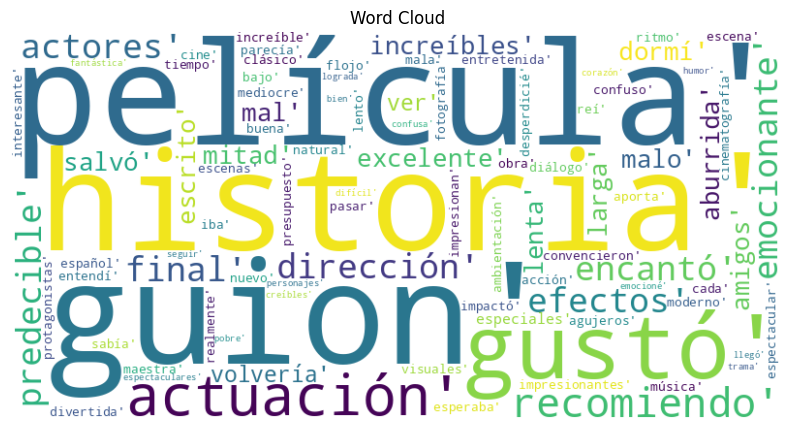

In [20]:
plt.figure(figsize=(10, 6))
wordcloud_clean = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(cleared_text)
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()